# Understanding Random Forest in Imbalanced Manufacturing Defect Dataset

### 1. **Introduction**: 
#### **Objective**:</br> This report looks into how Random Forests can be used for classification on a dataset that has an imbalance related to manufacturing defects. 

It emphasizes understanding the fundamental concepts of the algorithm, evaluating how well it performs. </br>
 <!-- to get an idea of how this method suited best for our model when we compare the it with the other models such as Logistic Regression, KN Classifier, SVC  -->

#### **Overview of Dataset**:</br> The dataset is sourced from "Kaggle.com" and it contains a variety of features with approximately 3300 records and the target variable is 'DefectStatus'</br>
The target variable in our dataset is imbalanced with ~2700 records as '1' i.e Defective and the rest ~600 records as '0' i.e Non-Defective.
This imbalance creates challanges for classification such as the standard evaluation metric i.e accuracy score, may not be able to give us meaningful insights to evaluate the performance of our model. </br>


##### **Approach and Important factors**: </br>

Exploratory Data Analysis (EDA): perform in-depth analyses to determine the structure of dataset, to determine significant features, and to find any potential relationship between the variables.</br>

Handling Imbalance: Using strategic techniques such as stratified sampling and class weighting in the Random Forest Model.</br>

Model Evaluation: The model's performance can be measured by evaluating the metrics such as precision, recall and F1 score obtained from the confusion matrix. This guarantees a comprehensive understanding of the model's ability to handel imbalanced data.

Comparison with other models: Evaluate the models such as Logistic Regression (LR), Support Vector Machines(SVM) and K Nearest Neighbours (KNN), and compare their performance with Random Forest using cross validation.


##### Additional Key Considerations for Random Forest are: 
- It has the ability to handel both numerical and categorical features.</br>
- Since it is based on averagin multiple decision trees it has a resistance to overfitting.
- Effectiveness in handling imbalanced data using different techniques/strategies and feature selection(this basically allows us to choose the most relevant features for our model)  

</br>
</br>
</br>

### 2. **Principles and Assumptions** :-
#### Understanding Random Forest Algorithm: </br>
##### Random Forest is a supervised learning technique used in Machine Learning for the purpose of classification and regression tasks.Random Forest builds on the basics of decision trees while takling some of their weaknesses. We can think of it as a team of decision makers (the decision trees) that works together inorder to perfom really well and create a very strong model.</br>
1. **Bootstrap Aggregation (Bagging)**: The algorithm starts by creating random samples from the training data. Each sample is taken with replacement, this ensures diverse training inputs for the trees.</br>
2. **Random Feature Selection**: at each split in a tree, the algorithm considers a random subset(or variables). This randomness introduces variety among the trees and hence reduces correlation between then and ultimately enhances the model's ability to generalize new data.</br>    
3. **Ensemble Averaging**: For classification task, Random Forest determines the final prediction by taking the majority vote from all the trees. whereas in regression tasks it averages the output of all tress to make a final prediction.</br>

#### Comparison with Decision Trees.
When comparing Random Forest with decison trees some of the differences really standout.<br>
    1. __Overfitting__ : Decision trees get too caught up in the details, especially when dealing with a complex dataset. Random Forest deals with this by combining several trees and averaging their predictions.<br>
    2. **Feature Selection** : Decision tree uses all the features when making splits, which can potentially lead to skewed results. This is easily tackled by random Forest by randomly choosing a subset of features at each split, resulting in more generalised results.
    3. **Stability** : for every minor change in the data decision trees results can show drastic change, in contrast for a random Forest it averages the predictions resulting in more reliable outcomes.

#### Key Factors of Random Forest
1. Random Forest gives us a measure of feature importance based on the contribution of each feature in order to reduce the impurity across the splits.
2. Naturally as well as especially when the hyperparameters are tuned, it minimizes the overfitting.
3. Random Forest has great scalability for both categorical and numerical data and can handle large datasets easily.

#### **Assumptions** : 
Random Forest(RF) has a few implicit assumptions which actually affect the performance, even though it is a non-parametric method that makes very few assumptions.<br>
1. In order to work optimally RF needs the individual trees to be uncorrelated. Feature selection and random sampling help in achieving this. <br>
2. It's important to have actual values in the feature variables of the dataset. This way, the classifier stands a better chance of making accurate predictions instead of just estimating. We should make sure to address any missing values before training the model.

#### **Random Forest with Imbalanced Data** :
**1. Class Weighting** = 'balanced' : this gives more importance to minority class samples during training.<br>
**2. Stratified Sampling** : this technique helps in maintaning the original class distribution preventing overfitting to the majority class.

#### **Why Random Forest Fits for our Dataset?**<br>
**Random Forest works really well for a dataset with diverse features.** <br>
**Random Forest effectively addresses the skewed class distribution.**<br>
**Random Forest is well suited for noisy or high-dimensional dataset.**<br>
**Random Forest has a great interpretability because the scores are feature important and we can control, analyse and better understand the predictive vairables**<br>

Random Forest is appropriate for these kinds of points and our dataset ticks each of the points mentioned above. 









### 3. Exploratory Data Analysis

#### 3.1 Load the Dataset
**Import Necessary Libraries** <br>
We will import the libraries we need to manipulate and visualising data.

In [1]:
#import librarires
import pandas as pd
import numpy as np

#loading the dataset
data = pd.read_csv('manufacturing_defect_dataset.csv')

print(data.shape)
print(data.head()) #first few rows of the dataset

(3240, 17)
   ProductionVolume  ProductionCost  ...  AdditiveMaterialCost  DefectStatus
0               202    13175.403783  ...            236.439301             1
1               535    19770.046093  ...            353.957631             1
2               960    19060.820997  ...            396.189402             1
3               370     5647.606037  ...            164.135870             1
4               206     7472.222236  ...            365.708964             1

[5 rows x 17 columns]


#### **3.2 Overview Data**

**1.Missing Values**: check for missing values and NA values


In [4]:
#check for missing values & NA
print(data.isnull().sum())


ProductionVolume        0
ProductionCost          0
SupplierQuality         0
DeliveryDelay           0
DefectRate              0
QualityScore            0
MaintenanceHours        0
DowntimePercentage      0
InventoryTurnover       0
StockoutRate            0
WorkerProductivity      0
SafetyIncidents         0
EnergyConsumption       0
EnergyEfficiency        0
AdditiveProcessTime     0
AdditiveMaterialCost    0
DefectStatus            0
dtype: int64


**2. Data Types**: when running the model for random forest it is very necessary that we convert the data types of columns to int in order for the model to process them.

In [5]:
# Check the data types of columns 
print(data.dtypes)

ProductionVolume          int64
ProductionCost          float64
SupplierQuality         float64
DeliveryDelay             int64
DefectRate              float64
QualityScore            float64
MaintenanceHours          int64
DowntimePercentage      float64
InventoryTurnover       float64
StockoutRate            float64
WorkerProductivity      float64
SafetyIncidents           int64
EnergyConsumption       float64
EnergyEfficiency        float64
AdditiveProcessTime     float64
AdditiveMaterialCost    float64
DefectStatus              int64
dtype: object


**3. Statistical Summary**:


In [ ]:
# gives a general summary of the basic stats
print(data.describe())

       ProductionVolume  ProductionCost  ...  AdditiveMaterialCost  DefectStatus
count       3240.000000     3240.000000  ...           3240.000000   3240.000000
mean         548.523148    12423.018476  ...            299.515479      0.840432
std          262.402073     4308.051904  ...            116.379905      0.366261
min          100.000000     5000.174521  ...            100.211137      0.000000
25%          322.000000     8728.829280  ...            194.922058      1.000000
50%          549.000000    12405.204656  ...            299.728918      1.000000
75%          775.250000    16124.462428  ...            403.178283      1.000000
max          999.000000    19993.365549  ...            499.982782      1.000000

[8 rows x 17 columns]


#### 3.3 Class Distribution

It is good practice to check for the distribution of target values especially in case of imbalanced datasets. If unkown, we can determine in this step.

In [8]:
#Class Distribution 
print(data['DefectStatus'].value_counts())

DefectStatus
1    2723
0     517
Name: count, dtype: int64


Let us visualise this imbalance.

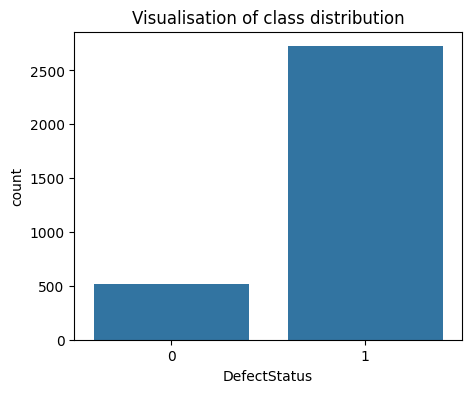

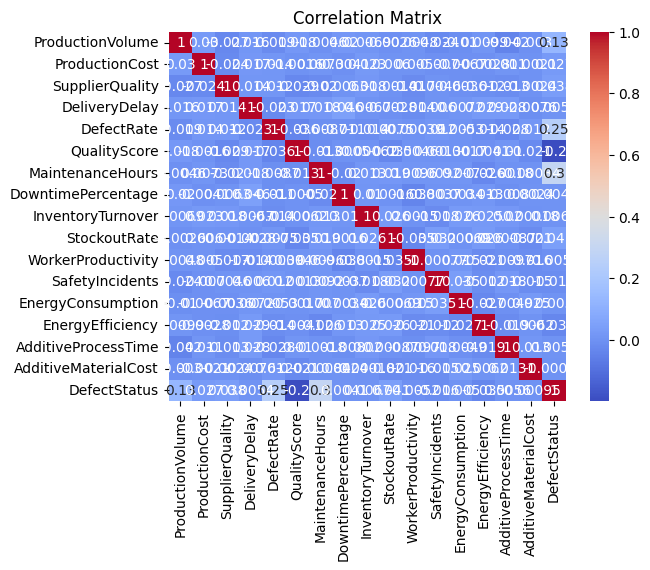

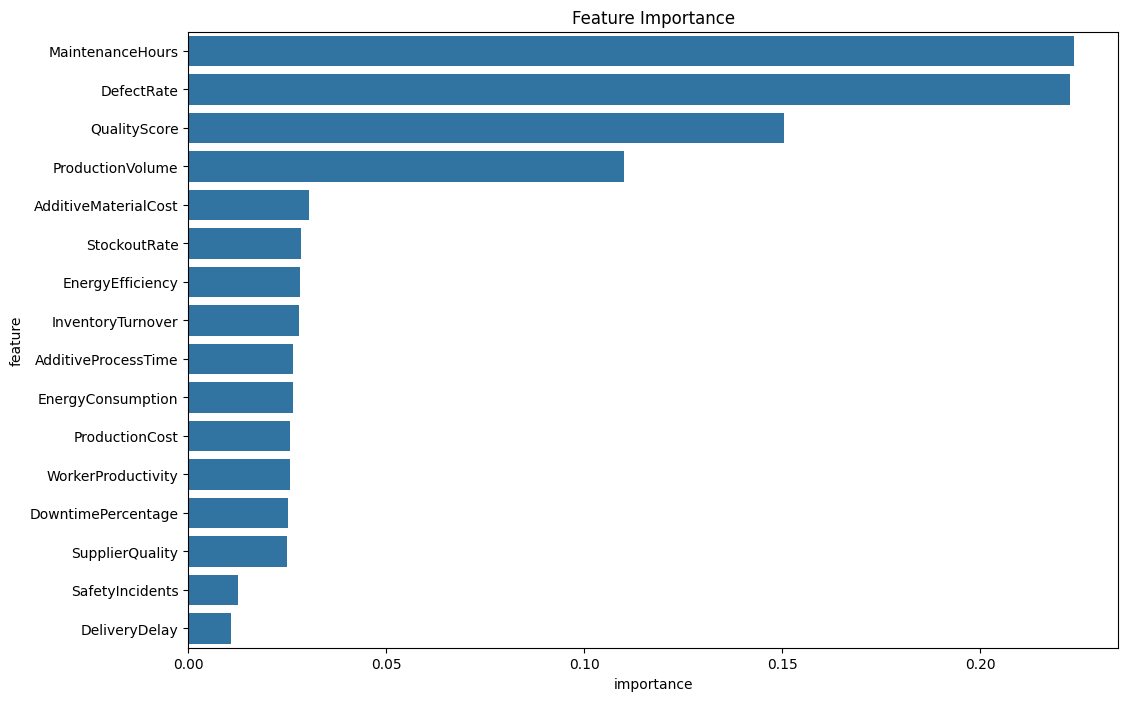

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier


# Plot the graph 
plt.figure(figsize=(5,4))
sns.countplot(x='DefectStatus', data=data)
plt.title('Visualisation of class distribution')
plt.show()

# 2. Distribution Analysis
# fig, axes = plt.subplots(5, 4, figsize=(20, 25))
# axes = axes.ravel()
# for i, col in enumerate(data.columns[:-1]):  # Exclude the target variable
#     sns.histplot(data[col], ax=axes[i], kde=True)
#     axes[i].set_title(col)
# plt.tight_layout()
# plt.show()

# Box plots
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=data.drop('DefectStatus', axis=1))
# plt.xticks(rotation=90)
# plt.title('Box Plots of Numerical Features')
# plt.show()

# Correlation matrix
correlation_matrix = data.corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pairplot for selected features
sns.pairplot(data, vars=['ProductionVolume', 'DefectRate', 'QualityScore', 'WorkerProductivity', 'SupplierQuality', 'EnergyEfficiency' ], hue='DefectStatus')
plt.show()

# 4. Feature Relationships with Target
# numerical_features = data.select_dtypes(include=[np.number]).columns.drop('DefectStatus')
# fig, axes = plt.subplots(5, 4, figsize=(20, 25))
# axes = axes.ravel()
# for i, col in enumerate(numerical_features):
#     sns.scatterplot(data=data, x=col, y='DefectStatus', ax=axes[i])
#     axes[i].set_title(f'{col} vs DefectStatus')
# plt.tight_layout()
# plt.show()

# 7. Feature Importance
X = data.drop('DefectStatus', axis=1)
y = data['DefectStatus']
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


In [ ]:
#using cross validation to choose the best model for my data set
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

datacv = pd.read_csv('manufacturing_defect_dataset.csv')

print(datacv.head())

datacv.isnull().sum()

datacv['DefectStatus'].value_counts()

X = datacv.drop(columns='DefectStatus', axis=1)
y = datacv['DefectStatus']

le = LabelEncoder()
for column in X.select_dtypes(include=['object']):  # For object columns only
        X[column] = le.fit_transform(X[column])
    
    # Encode the target variable if it's not already numeric
if y.dtype == 'object':
        y = le.fit_transform(y)


print("These are columns in X",X)
print("this is the target column", y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=15)

print("This is the shape of the data when split",X.shape, X_train.shape, X_test.shape)

#list of models to run 
models = [LogisticRegression(max_iter=3000), SVC(kernel='linear'), KNeighborsClassifier(), RandomForestClassifier(random_state=15, class_weight='balanced')]

#Define a function to compare the accuracy of the models

def compare_models_train_test():
    for model in models:

        #training the model
        model.fit(X_train, y_train)
        #evaluating the model
        test_data_prediction = model.predict(X_test)

        accuracy = accuracy_score(y_test, test_data_prediction)
        print('Accuracy score of the, ', model, '= ', accuracy)


#run the function
compare_models_train_test()

#calculating cross_val_score and creating a function to compare the mean accuracy across different models

##Logistic Regression(LR)
# cv_score_LR = cross_val_score(LogisticRegression(max_iter=3000), X, y, cv=5) #cv = Determines the cross-validation splitting strategy.(default cv=none gives 5 folds but defining 5 also works the same)
# print(cv_score_LR)

# mean_accuracy_LR = sum(cv_score_LR)/len(cv_score_LR)
# mean_accuracy_LR = mean_accuracy_LR*100

# print(mean_accuracy_LR)

# #Support Vector Classifier
# cv_score_SVC = cross_val_score(SVC(kernel='linear'), X, y, cv=5)
# print(cv_score_SVC)

# mean_accuracy_SVC = sum(cv_score_SVC)/len(cv_score_SVC)
# mean_accuracy_SVC = mean_accuracy_SVC*100

# print(mean_accuracy_SVC)

# #KNeighbours Classifier
# cv_score_KN = cross_val_score(KNeighborsClassifier(), X, y, cv=5)
# print(cv_score_KN)

# mean_accuracy_KN = sum(cv_score_KN)/len(cv_score_KN)
# mean_accuracy_KN = mean_accuracy_KN*100

# print(mean_accuracy_KN)

# #Random Forest Classifier
# cv_score_RF = cross_val_score(RandomForestClassifier(), X, y, cv=5)
# print(cv_score_RF)

# mean_accuracy_RF = sum(cv_score_RF)/len(cv_score_RF)
# mean_accuracy_RF = mean_accuracy_RF*100

# print(mean_accuracy_RF)


#Compare the cv_score for each model 

def compare_models_cv():
    for model in models: 
        cv_score = cross_val_score(model, X, y, cv=5)
        mean_accuracy = sum(cv_score)/len(cv_score)
        mean_accuracy = mean_accuracy*100

        print('CrossValidation accuracies for', model, '= ', cv_score)
        print('Accuracy mean for the ', model, mean_accuracy)

compare_models_cv()




(3240, 16) (2592, 16) (648, 16)


This is accuracy for training data:  1.0
This is accuracy for test data:  0.9614197530864198
This is the confusion matrix  [[ 82  21]
 [  4 541]]
82 21 4 541
True Negative=  82 False Positive=  21 False Negative=  4 True Positive 541


<Axes: >

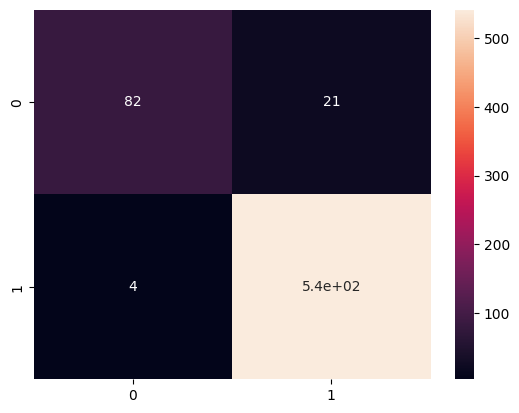

In [ ]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


#Evaluation of model based on accuracy and confusion matrix

datacf = pd.read_csv('manufacturing_defect_dataset.csv') #>>>load data

X = datacf.drop(columns='DefectStatus', axis=1)
y = datacf['DefectStatus']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=15) #>>> split the data
print(X.shape, X_train.shape, X_test.shape)

model = RandomForestClassifier(random_state=15, class_weight='balanced')
# training the LogisticRegression model with Training data
model.fit(X_train, y_train)

#accuracy training on training data 
X_train_pred_y = model.predict(X_train)
training_data_accuracy = accuracy_score(y_train, X_train_pred_y)
print("This is accuracy for training data: ",training_data_accuracy)

#accuracy training on test data
X_test_pred_y = model.predict(X_test)
test_data_accuracy = accuracy_score(y_test, X_test_pred_y)
print("This is accuracy for test data: ",test_data_accuracy)

#Confusion matrix

cf_matrix = confusion_matrix(y_test, X_test_pred_y)
print("This is the confusion matrix ",cf_matrix)

tn, fp, fn, tp = cf_matrix.ravel()
print(tn, fp, fn, tp)
print("True Negative= ",tn, "False Positive= ", fp,"False Negative= ", fn,"True Positive" ,tp)

sns.heatmap(cf_matrix, annot=True)




In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE
# from xgboost import XGBClassifier
# from scipy.stats import , uniform




#from collections import Counter


# Step 2: Load and Explore Dataset

def load_data(file_path):
    data = pd.read_csv(file_path)

    return data 
   

def preprocess_and_split_data(data, target_column):
    
    ''' This is another way to implement label encoder
    le = preprocessing.LabelEncoder()
    for column_name in data.columns:
       if data[column_name].dtype == object:
          data[column_name] = le.fit_transform(data[column_name])
     else:
        pass
    '''
    
    X = data.drop(columns=[target_column])  # Drop the target column to get the features
    y = data[target_column]  # Extract the target variable

    #  # Feature Engineering
    # X['balance_salary_ratio'] = X['balance'] / (X['estimated_salary'] + 1)
    # X['age_group'] = pd.cut(X['age'], bins=[0, 30, 45, 60, 100], labels=[0, 1, 2, 3])

    # Feature Engineering for manufacturing defect
    # X['ProductionEfficiency'] = X['ProductionVolume'] / (X['ProductionCost'] + 1)
    # X['QualityEfficiency'] = X['QualityScore'] / (X['DefectRate'] + 1)
    # X['MaintenanceEfficiency'] = X['DowntimePercentage'] / (X['MaintenanceHours'] + 1)
    # X['InventoryEfficiency'] = X['InventoryTurnover'] / (X['StockoutRate'] + 1)
    # X['EnergyEfficiencyRatio'] = X['EnergyEfficiency'] / (X['EnergyConsumption'] + 1)
    # X['AdditiveEfficiency'] = X['AdditiveProcess'] / (X['TimeAdditive'] + 1)

    le = LabelEncoder()
    for column in X.select_dtypes(include=['object']):  # For object columns only
        X[column] = le.fit_transform(X[column])
    
    # Encode the target variable if it's not already numeric
    if y.dtype == 'object':
        y = le.fit_transform(y)


    # # Standardization
    # scaler = StandardScaler()
    # X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    # Convert float columns to integers
    # for column in X.select_dtypes(include=['float']):  # For float columns only
    #    X[column] = X[column].astype(int)  # Convert to integer
   
    # Feature Selection
    rfe = RFE(estimator=RandomForestClassifier(n_estimators=100, random_state=15), n_features_to_select=10)
    X = pd.DataFrame(rfe.fit_transform(X, y), columns=X.columns[rfe.support_])

    # Now you can safely get the selected features
    selected_features = X.columns
    print("Selected Features:", selected_features)

    # Optional: View feature rankings
    # feature_rankings = pd.Series(rfe.ranking_, index=X.columns)
    # print("Feature Rankings:\n", feature_rankings.sort_values())

    # Handle Class Imbalance
    # smote = SMOTE(random_state=15)
    # X_resampled, y_resampled = smote.fit_resample(X, y)
    
    return train_test_split(X, y, test_size=0.2, random_state=15, stratify=y)  # Split the data into training and  testing sets,and use stratify to approximately maintain the imbalanced ratio of taget column




'''
# Step 3: Train Random Forest Model
def train_random_Forest(X_train, y_train):
    
    #print("counter before SMOTE:", Counter(y_train))
    #Apply SMOTE for resampling
    #smote = SMOTE(random_state=15)
    #X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
    #print("Counter after SMOTE:", Counter(y_resampled))
    
    rf = RandomForestClassifier(random_state=15, class_weight='balanced')  # Create an instance of RandomForestClassifier with fixed random state
    rf.fit(X_train, y_train)  # Fit the model to the training data
    print("these are the params",rf.get_params())
    return rf  # Return the trained model
'''


# Step 3: Train Random Forest Model with Hyperparameter Tuning
def train_random_Forest_with_tuning(X_train, y_train):
    # Define hyperparameter space for Random Search
    param_dist = {
    'n_estimators': (50, 200),  # Number of trees in the Forest
    'max_depth': [None] + list(range(5, 20)),  # Depth of each tree
    'min_samples_split': (2, 10),  # Minimum number of samples required to split an internal node
    'min_samples_leaf': (1, 10),  # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split
    'criterion': ['gini', 'entropy']  # Function to measure the quality of a split
    }
    
    # Create RandomizedSearchCV object and fit it to training data
    
    rf = RandomForestClassifier(random_state=15, class_weight='balanced')
    randomized_search = RandomizedSearchCV(estimator=rf,
                                        param_distributions=param_dist,
                                        n_iter=100,  # Number of parameter settings sampled
                                        cv=5,  # Cross-validation splitting strategy
                                        scoring='accuracy',  # Metric to optimize
                                        n_jobs=-1,  # Use all available cores
                                        random_state=15)
    
    randomized_search.fit(X_train, y_train)

    # Return the best model found by RandomizedSearchCV
    return randomized_search.best_estimator_, randomized_search.best_params_, randomized_search.best_score_


# # Step 3: Train XGBoost Model with Hyperparameter Tuning
# def train_xgboost_with_tuning(X_train, y_train):
#     param_dist = {
#         'n_estimators': randint(100, 1000),
#         'max_depth': randint(3, 10),
#         'learning_rate': uniform(0.01, 0.3),
#         'subsample': uniform(0.6, 0.4),
#         'colsample_bytree': uniform(0.6, 0.4)
#     }

    # xgb = XGBClassifier(random_state=15, use_label_encoder=False, eval_metric='logloss')
    # cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=15)
    
    # randomized_search = RandomizedSearchCV(
    #     estimator=xgb,
    #     param_distributions=param_dist,
    #     n_iter=100,
    #     cv=cv,
    #     scoring='accuracy',
    #     n_jobs=-1,
    #     random_state=15
    # )
    
    # randomized_search.fit(X_train, y_train)
    # return randomized_search.best_estimator_, randomized_search.best_params_, randomized_search.best_score_

# Step 4: Evaluate Model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)  # Get the model's predictions on the test data

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Calculate F1 score (weighted average for imbalanced classes)
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Calculate precision
    precision = precision_score(y_test, y_pred, average='weighted')

    # Calculate recall
    recall = recall_score(y_test, y_pred, average='weighted')

    # Specificity (True Negative Rate)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()  # Get the confusion matrix
    specificity = tn / (tn + fp)  # Calculate specificity

    # Display metrics
    print("Accuracy:", accuracy)
    print("F1 Score (Weighted):", f1)
    print("Precision (Weighted):", precision)
    print("Recall (Weighted):", recall)
    print("Specificity:", specificity)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))  # Detailed classification report



#print("\nResults with SMOTE and class_weight='balanced':")
#print(classification_report(y_test, rf_pred))



# Step 5: Main Workflow
def run_analysis(file_path, target_column):
    # Load data
    data = load_data(file_path)

    #this is part of EDA, sort it out later
    print("Data type:", type(data))
    print("Data columns:", data.columns)
    print("First few rows of data:\n", data.head())
    print("Null values in each column:\n", data.isnull().sum())

    #process and split data
    X_train, X_test, y_train, y_test = preprocess_and_split_data(data, target_column)
    
    # EDA as well
    print("Shape of X_train:", X_train.shape)
    print("Shape of X_test:", X_test.shape)

     # Train the Random Forest model with hyperparameter tuning
    best_model, best_params, best_score = train_random_Forest_with_tuning(X_train, y_train)

    # Evaluate the best model on test data
    print(f"\nEvaluation Metrics for {file_path} using randomsearchcv:\n")
    evaluate_model(best_model, X_test, y_test)

    # Print best parameters and score from tuning
    print("Best hyperparameters:", best_params)
    print("Best cross-validated score:", best_score)

    '''
    # Train the Random Forest model
    model = train_random_Forest(X_train, y_train)
    
    # Evaluate the model and print metrics
    print(f"\nEvaluation Metrics for {file_path}:\n")
    evaluate_model(model, X_test, y_test)
    '''


# Step 6: Test with different datasets
file_path = './IBM_CHRN_CSV.csv'  # Replace with actual file path of Dataset 1
target_column = 'DefectStatus'  # Replace with the actual target column name
run_analysis(file_path, target_column)


#this is part of EDA
#data = pd.read_csv(file_path)



In [ ]:
import struct

print(f"Python Architecture: {struct.calcsize('P') * 8}-bit")


In [ ]:
data=load_data(file_path)
data.info()
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)
print(data[categorical].head())

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :\n\n', numerical)
data[numerical].head()